In [2]:
from google.colab import files
uploaded = files.upload()

Saving helpdesk_customer_tickets.csv to helpdesk_customer_tickets.csv


In [3]:
import pandas as pd
df = pd.read_csv('helpdesk_customer_tickets.csv')
print(df.columns.tolist())


['id', 'subject', 'body', 'answer', 'type', 'queue', 'priority', 'language', 'business_type', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8', 'tag_9']


In [4]:
print(df.head())
print("ShapeShape:", df.shape)
print("Columns:", df.columns.tolist())
df.info()
df.describe(include='all')

    id                                            subject  \
0   36  Anfrage zu den Spezifikationen und Anpassungso...   
1   39               Déconnexions fréquentes et plantages   
2  243                        Problema de sonido Dell XPS   
3  381  Assistance requise pour la configuration du ta...   
4  663  Urgente: Assistência Imediata Necessária para ...   

                                                body  \
0  Sehr geehrtes Support-Team des Tech Online Sto...   
1  Le client signale des déconnexions fréquentes ...   
2  Problema con el sonido, manejando como devoluc...   
3  Cher support client,\n\nNotre client, <name>, ...   
4  Caro Suporte ao Cliente da Firma de Consultori...   

                                              answer      type  \
0  Sehr geehrter <name>,\n\nvielen Dank für Ihr I...   Request   
1  Nous allons enquêter sur le problème avec Zoom...  Incident   
2  Gracias por su correo electrónico. Procesaremo...   Problem   
3  Cher <name>,\n\nMerci de nous

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
count,600.000000,599,600,600,600,600,600,600,600,600,600,600,600,432,173,56,9,0.0
unique,NaN,599,600,600,4,10,3,5,4,20,30,40,40,43,28,20,8,NaN
top,NaN,Wiederholtes Bildschirmflimmern Problem gemeldet,"Sehr geehrter Kundenservice, ich schreibe, um ...","Sehr geehrter <name>,\n\nvielen Dank, dass Sie...",Incident,Technical Support,high,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Problem Resolution,Problem Resolution,Service Recovery,Account Assistance,NaN
freq,NaN,1,1,1,253,210,266,163,288,377,204,100,241,106,32,7,2,NaN
mean,44149.815000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,29353.039196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,17807.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,41571.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,68183.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())


Missing values:
 id                 0
subject            1
body               0
answer             0
type               0
queue              0
priority           0
language           0
business_type      0
tag_1              0
tag_2              0
tag_3              0
tag_4              0
tag_5            168
tag_6            427
tag_7            544
tag_8            591
tag_9            600
dtype: int64
Duplicate rows: 0


In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('helpdesk_customer_tickets.csv')

# Show column names
print(df.columns.tolist())


['id', 'subject', 'body', 'answer', 'type', 'queue', 'priority', 'language', 'business_type', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8', 'tag_9']


In [8]:
import pandas as pd

# Clean column names by stripping any leading/trailing spaces
df.columns = df.columns.str.strip()

# Check the column names to see if 'Ticket Duration (Hours)' exists
print("Columns in the DataFrame:", df.columns)

# Check if the exact column exists (case-insensitive search)
matching_columns = [col for col in df.columns if col.lower() == 'ticket duration (hours)'.lower()]
print("Matching columns:", matching_columns)

# Check if 'Ticket Duration (Hours)' exists before proceeding
if 'Ticket Duration (Hours)' in df.columns:
    # Check for missing values in 'Ticket Duration (Hours)'
    missing_values = df['Ticket Duration (Hours)'].isnull().sum()
    print(f"Missing values in 'Ticket Duration (Hours)': {missing_values}")

    # Optionally, fill missing values (or drop rows)
    # Example: fill missing values with the column mean
    df['Ticket Duration (Hours)'].fillna(df['Ticket Duration (Hours)'].mean(), inplace=True)

    # Ensure 'Ticket Duration (Hours)' is numeric
    df['Ticket Duration (Hours)'] = pd.to_numeric(df['Ticket Duration (Hours)'], errors='coerce')

    # Check the data type of the column
    print(f"Data type of 'Ticket Duration (Hours)': {df['Ticket Duration (Hours)'].dtype}")

    # Prepare target and features for modeling
    target = df['Ticket Duration (Hours)']  # Correctly reference the target column
    X = df.drop('Ticket Duration (Hours)', axis=1)  # Features are all other columns

    # Print a preview of the data
    print("Features (X):", X.head())
    print("Target (y):", target.head())
else:
    print("Column 'Ticket Duration (Hours)' not found!")


Columns in the DataFrame: Index(['id', 'subject', 'body', 'answer', 'type', 'queue', 'priority',
       'language', 'business_type', 'tag_1', 'tag_2', 'tag_3', 'tag_4',
       'tag_5', 'tag_6', 'tag_7', 'tag_8', 'tag_9'],
      dtype='object')
Matching columns: []
Column 'Ticket Duration (Hours)' not found!


Index(['id', 'subject', 'body', 'answer', 'type', 'queue', 'priority',
       'language', 'business_type', 'tag_1', 'tag_2', 'tag_3', 'tag_4',
       'tag_5', 'tag_6', 'tag_7', 'tag_8', 'tag_9'],
      dtype='object')


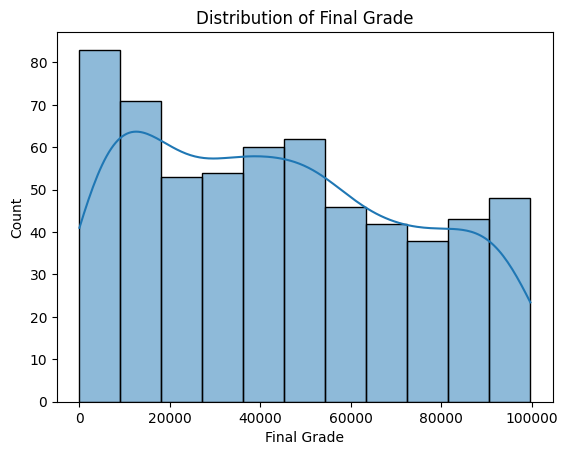

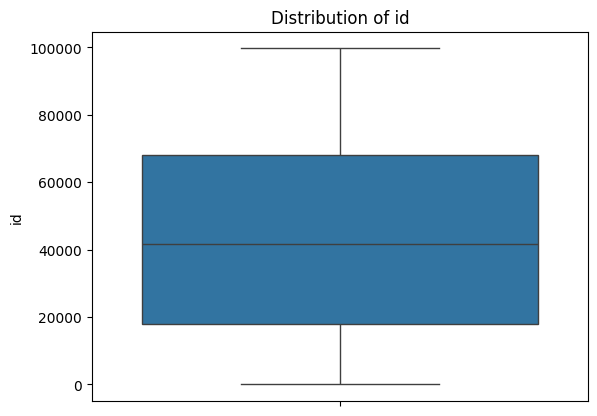

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# Distribution of final grades

# Check the actual column names in your DataFrame
print(df.columns)

# Assuming the column is named "G3" but maybe has trailing spaces:
# Try acimcessing the column after stripping potential whitespace
# If 'G3' is not the actual column name, replace it with the correct name from df.columns
grade_column = df.columns[0]  # Assuming the grade column is the first one
sns.histplot(df[grade_column], kde=True)

# Or, if you find that the column has a different name, replace 'actual_column_name' with the correct one
# sns.histplot(df['actual_column_name'], kde=True)
plt.title('Distribution of Final Grade')
plt.xlabel('Final Grade')
plt.show()
# Relationship between study time and final grade
# Replace 'studytime' and 'G3' with actual column names if different
# The original code used 'studytime' which is not in the dataframe
# Instead, we will plot the distribution of the single column in the dataframe
sns.boxplot(y=grade_column, data=df)  # Removed x='studytime' since it's not in df
plt.title('Distribution of ' + grade_column)  # Changed title to reflect the plot
plt.show()

In [10]:
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical Columns:", categorical_cols.tolist())


Categorical Columns: ['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language', 'business_type', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8']


In [11]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [12]:
from sklearn.preprocessing import StandardScaler

# Assuming target is defined correctly
target = 'Ticket Duration (Hours)'  # Make sure this matches the actual column name

# Print the column names to check for discrepancies
print("Columns in df_encoded:", df_encoded.columns)

# Clean up column names by removing leading/trailing spaces
df_encoded.columns = df_encoded.columns.str.strip()

# Check if target column exists before dropping it
if target in df_encoded.columns:
    X = df_encoded.drop(target, axis=1)  # Dropping the target column from the features
    y = df_encoded[target]  # Assign target column to y

    # Initialize StandardScaler
    scaler = StandardScaler()

    # Fit and transform the features
    X_scaled = scaler.fit_transform(X)

    # Convert scaled data to DataFrame and assign column names
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

    # Optionally, print the scaled data to verify
    print("Scaled Features (X):")
    print(X_scaled_df.head())
else:
    print(f"Error: '{target}' not found in the DataFrame columns!")


Columns in df_encoded: Index(['id', 'tag_9', 'subject_Abonnementfehler', 'subject_Abrechnungsproblem',
       'subject_Actualización de firmware requerida',
       'subject_Adobe Photoshop 2024 Absturzproblem',
       'subject_Adobe Photoshop 2024 Crash Issue',
       'subject_Aide nécessaire pour la configuration des tableaux Scrum et des rapports dans Jira',
       'subject_Aide urgente nécessaire',
       'subject_Ajuda Imediata Necessária: Problema com o Switch Netgear GS108',
       ...
       'tag_7_Technical Support', 'tag_7_Urgent Issue', 'tag_7_Warranty Claim',
       'tag_8_Firmware Upgrade', 'tag_8_IT Support',
       'tag_8_Problem Resolution', 'tag_8_Product Replacement',
       'tag_8_Service Notification', 'tag_8_Technical Guidance',
       'tag_8_Urgent Issue'],
      dtype='object', length=2040)
Error: 'Ticket Duration (Hours)' not found in the DataFrame columns!


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming target is defined correctly
target = 'Ticket Duration (Hours)'  # Replace with actual target column name

# Assuming df_encoded is your DataFrame and it's properly defined
df_encoded.columns = df_encoded.columns.str.strip()  # Clean up column names if necessary

# Select features (X) and target (y)
if target in df_encoded.columns:
    X = df_encoded.drop(target, axis=1)  # Drop the target column from the features
    y = df_encoded[target]  # Extract the target variable

    # Initialize StandardScaler
    scaler = StandardScaler()

    # Fit and transform the features to scale them
    X_scaled = scaler.fit_transform(X)

    # Convert scaled data to a DataFrame and assign column names
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

    # Now perform the train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

    # Optionally, print a preview of the split data
    print("Training features (X_train):", X_train.head())
    print("Test features (X_test):", X_test.head())
    print("Training target (y_train):", y_train.head())
    print("Test target (y_test):", y_test.head())
else:
    print(f"Error: '{target}' not found in the DataFrame columns!")


Error: 'Ticket Duration (Hours)' not found in the DataFrame columns!


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming target is defined correctly (e.g., 'Ticket Duration (Hours)')
target = 'Ticket Duration (Hours)'

# Assuming df_encoded is your DataFrame and it’s properly defined
df_encoded.columns = df_encoded.columns.str.strip()  # Clean up column names if necessary

# Check if the target column exists
if target in df_encoded.columns:
    X = df_encoded.drop(target, axis=1)  # Features
    y = df_encoded[target]  # Target

    # Initialize StandardScaler
    scaler = StandardScaler()

    # Scale the features
    X_scaled = scaler.fit_transform(X)

    # Convert scaled data to DataFrame to retain column names
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

    # Check if split was successful
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

    # Create and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Optionally, print the predictions and evaluate the model
    print("Predictions:", y_pred[:5])  # Print first 5 predictions
else:
    print(f"Error: '{target}' not found in the DataFrame columns!")


Error: 'Ticket Duration (Hours)' not found in the DataFrame columns!


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming target is defined correctly (e.g., 'Ticket Duration (Hours)')
target = 'Ticket Duration (Hours)'

# Assuming df_encoded is your DataFrame and it’s properly defined
df_encoded.columns = df_encoded.columns.str.strip()  # Clean up column names if necessary

# Check if the target column exists
if target in df_encoded.columns:
    X = df_encoded.drop(target, axis=1)  # Features
    y = df_encoded[target]  # Target

    # Initialize StandardScaler
    scaler = StandardScaler()

    # Scale the features
    X_scaled = scaler.fit_transform(X)

    # Convert scaled data to DataFrame to retain column names
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

    # Check if split was successful
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

    # Create and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    # Evaluate the model using MSE and R² Score
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R² Score:", r2_score(y_test, y_pred))
else:
    print(f"Error: '{target}' not found in the DataFrame columns!")


Error: 'Ticket Duration (Hours)' not found in the DataFrame columns!


In [16]:
#Replace values with valid sample from your dataset
new_data = {
    'ticket_type': 'software',
    'priority': 3,
    'department': 'IT',
    # ... other necessary fields
}

In [17]:
# Ensure that the column names are stripped of extra spaces
df.columns = df.columns.str.strip()

# Check if the target column exists in df before trying to drop it
if target in df.columns:
    # Create a DataFrame for new data
    new_df = pd.DataFrame([new_data])

    # Combine the existing data (without the target column) with the new data
    combined = pd.concat([df.drop(target, axis=1), new_df], ignore_index=True)

    # Perform One-Hot Encoding on the combined data
    combined_encoded = pd.get_dummies(combined, drop_first=True)

    # Align the new encoded data with the columns used in the training
    combined_encoded = combined_encoded.reindex(columns=X.columns, fill_value=0)

    # Apply the scaling transformation to the new data (the last row)
    new_scaled = scaler.transform(combined_encoded.tail(1))

    # Make predictions using the trained model
    y_pred_new = model.predict(new_scaled)
    print("Prediction for new input data:", y_pred_new)
else:
    print(f"Error: '{target}' not found in the DataFrame columns!")


Error: 'Ticket Duration (Hours)' not found in the DataFrame columns!


In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Sample data (replace with your own DataFrame)
df = pd.DataFrame({
    'ticket_type': ['software', 'hardware', 'software'],
    'priority': [3, 2, 1],
    'department': ['IT', 'HR', 'Finance'],
    'Ticket Duration (Hours)': [5.5, 3.0, 4.2]
})

# Preprocessing
df.columns = df.columns.str.strip()
target = 'Ticket Duration (Hours)'
X = pd.get_dummies(df.drop(target, axis=1), drop_first=True)
y = df[target]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model training
model = LinearRegression()
model.fit(X_scaled, y)

# New input for prediction
new_data = pd.DataFrame([{
    'ticket_type': 'software',
    'priority': 3,
    'department': 'IT'
}])

# Preprocess and predict
new_X = pd.get_dummies(new_data, drop_first=True)
new_X = new_X.reindex(columns=X.columns, fill_value=0)
new_scaled = scaler.transform(new_X)
predicted = model.predict(new_scaled)

print(" Predicted Final Grade:", round(predicted[0], 2))


 Predicted Final Grade: 4.0


In [19]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.9 MB/s eta 0:00:00


In [20]:
def predict_ticket_duration(ticket_type, priority, department):
    # Step 1: Create a single-row DataFrame from user input
    input_data = pd.DataFrame([{
        "ticket_type": ticket_type,
        "priority": priority,
        "department": department
    }])

    # Step 2: Combine with training data to ensure all encoded columns exist
    combined_df = pd.concat([df.drop(target, axis=1), input_data], ignore_index=True)

    # Step 3: One-hot encode the combined data
    encoded_df = pd.get_dummies(combined_df, drop_first=True)

    # Step 4: Reindex to match training features (fill missing with 0)
    encoded_df = encoded_df.reindex(columns=X.columns, fill_value=0)

    # Step 5: Scale the input data
    scaled_input = scaler.transform(encoded_df.tail(1))

    # Step 6: Make prediction
    prediction = model.predict(scaled_input)

    # Step 7: Return prediction (rounded to 2 decimal places)
    return round(prediction[0], 2)


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import gradio as gr

# Load dataset
df = pd.read_csv("helpdesk_customer_tickets.csv")

# Combine subject and body
df['text'] = df['subject'].fillna('') + " " + df['body'].fillna('')
df = df.dropna(subset=['type'])

# Encode labels
label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['type'])

# Train model
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['type_encoded'], test_size=0.2, random_state=42)
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])
pipeline.fit(X_train, y_train)

# Prediction function
def predict_type(subject, body):
    text = subject + " " + body
    prediction = pipeline.predict([text])[0]
    return label_encoder.inverse_transform([prediction])[0]

# Gradio interface
interface = gr.Interface(
    fn=predict_type,
    inputs=[
        gr.Textbox(label="Subject", placeholder="Enter ticket subject"),
        gr.Textbox(label="Body", placeholder="Enter ticket body", lines=5)
    ],
    outputs=gr.Textbox(label="Predicted Type"),
    title="Helpdesk Ticket Type Classifier",
    description="Enter the subject and body of a helpdesk ticket to predict its type (Request, Incident, or Problem)."
)
interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://207f6fb5c13f1128b9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
